<a href="https://colab.research.google.com/github/Enzo1193/aprendizajedemaquina/blob/main/Parcial_1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Subir archivo desde el sistema de archivos
from google.colab import files
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing.csv


In [ ]:
import pandas as pd

# Cargar archivo
df = pd.read_csv("AmesHousing.csv")  # Asegúrate de que el nombre sea correcto

# Tamaño del dataset
print("Shape of the dataset:", df.shape)

# Primeras filas
display(df.head())

# Información general
print("\nData types and non-null values:")
df.info()



Shape of the dataset: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

Tamaño del dataset: (2930, 82)

Tipos de datos:
object     43
int64      28
float64    11
Name: count, dtype: int64 

Columnas con valores nulos:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64 

Variables numéricas: 39
Variables categóricas: 43



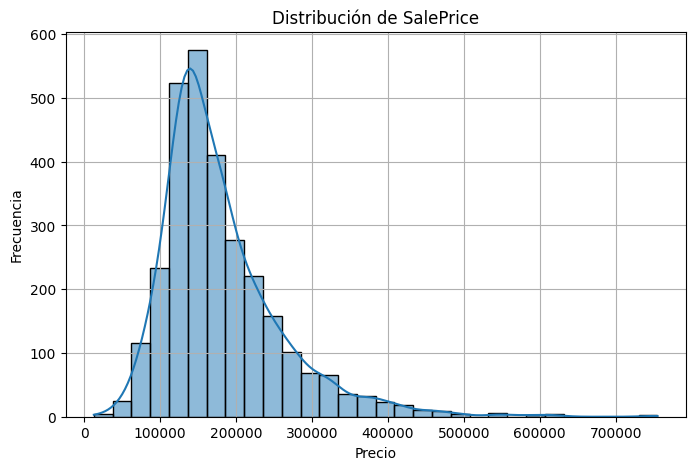

Top 10 variables numéricas correlacionadas con SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mostrar información general del dataset
print(f"Tamaño del dataset: {df.shape}\n")

# Conteo de tipos de datos
print("Tipos de datos:")
print(df.dtypes.value_counts(), "\n")

# Verificar valores nulos ordenados de mayor a menor
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columnas con valores nulos:")
print(missing, "\n")

# Variables numéricas y categóricas
num_vars = df.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = df.select_dtypes(include=["object"]).columns.tolist()
print(f"Variables numéricas: {len(num_vars)}")
print(f"Variables categóricas: {len(cat_vars)}\n")

# Distribución de SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Correlación top 10 con SalePrice
corr = df[num_vars].corr()
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10)
print("Top 10 variables numéricas correlacionadas con SalePrice:")
print(top_corr)


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Copia de seguridad del dataset original
df_clean = df.copy()

# 1. Eliminar columnas con más del 50% de valores nulos
threshold = 0.5 * df_clean.shape[0]
cols_nulls = df_clean.columns[df_clean.isnull().sum() > threshold].tolist()

# Solo eliminar esas columnas (sin borrar las manuales aún)
df_clean.drop(columns=cols_nulls, inplace=True, errors='ignore')

print(f"Columnas eliminadas por >50% nulos: {len(cols_nulls)}")
print(f"Nuevo shape del dataset: {df_clean.shape}")

# Correlación entre variables numéricas para detectar colinealidad fuerte (>0.9)
num_vars = df_clean.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df_clean[num_vars].corr().abs()

# Encontrar pares con correlación > 0.9 (sin repetir ni diagonal)
high_corr_var_pairs = []
for i in range(len(num_vars)):
    for j in range(i+1, len(num_vars)):
        if corr_matrix.iloc[i, j] > 0.9:
            high_corr_var_pairs.append((num_vars[i], num_vars[j], corr_matrix.iloc[i, j]))

print("\nPares de variables con correlación > 0.9 (posible colinealidad):")
for var1, var2, corr_val in high_corr_var_pairs:
    print(f"{var1} - {var2}: {corr_val:.3f}")

# Cálculo del VIF para variables numéricas restantes
# Primero hay que eliminar filas con nulos para el cálculo de VIF
df_vif = df_clean[num_vars].dropna()

vif_data = pd.DataFrame()
vif_data['variable'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print("\nVIF de variables numéricas (valores altos indican multicolinealidad):")
print(vif_data.sort_values(by='VIF', ascending=False))



Columnas eliminadas por >50% nulos: 5
Nuevo shape del dataset: (2930, 77)

Pares de variables con correlación > 0.9 (posible colinealidad):
Order - Yr Sold: 0.976


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF de variables numéricas (valores altos indican multicolinealidad):
           variable           VIF
16  Low Qual Fin SF           inf
17      Gr Liv Area           inf
14       1st Flr SF           inf
11     BsmtFin SF 2           inf
12      Bsmt Unf SF           inf
13    Total Bsmt SF           inf
10     BsmtFin SF 1           inf
15       2nd Flr SF           inf
37          Yr Sold  2.521158e+04
1               PID  1.931334e+01
38        SalePrice  6.277196e+00
7        Year Built  6.039687e+00
26    Garage Yr Blt  4.746503e+00
27      Garage Cars  4.604859e+00
28      Garage Area  4.591574e+00
24    TotRms AbvGrd  4.339564e+00
0             Order  4.319052e+00
5      Overall Qual  3.875442e+00
20        Full Bath  2.934802e+00
8    Year Remod/Add  2.642107e+00
22    Bedroom AbvGr  2.318848e+00
21        Half Bath  2.229165e+00
18   Bsmt Full Bath  2.173724e+00
3      Lot Frontage  1.916474e+00
2       MS SubClass  1.759235e+00
6      Overall Cond  1.676890e+00
9      Mas 

In [ ]:
# Lista de columnas a eliminar por VIF infinito y multicolinealidad fuerte
cols_to_remove_vif = [
    "Low Qual Fin SF", "Gr Liv Area", "1st Flr SF", "BsmtFin SF 2",
    "Bsmt Unf SF", "Total Bsmt SF", "BsmtFin SF 1", "2nd Flr SF",
    "PID", "Order"
]

# Eliminar columnas
df_clean.drop(columns=cols_to_remove_vif, inplace=True, errors='ignore')

# Mostrar el shape y las columnas eliminadas
print(f"Se eliminaron {len(cols_to_remove_vif)} columnas por VIF infinito y multicolinealidad fuerte.")
print(f"Nuevo shape del dataset: {df_clean.shape}")


Se eliminaron 10 columnas por VIF infinito y multicolinealidad fuerte.
Nuevo shape del dataset: (2930, 67)


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separar columnas numéricas y categóricas
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Imputar valores faltantes en columnas numéricas con la mediana (menos sensible a outliers)
num_imputer = SimpleImputer(strategy='median')
df_clean[numerical_cols] = num_imputer.fit_transform(df_clean[numerical_cols])

# Imputar valores faltantes en columnas categóricas con la moda (valor más frecuente)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar variables numéricas vs SalePrice
def plot_numeric_features(df, target='SalePrice'):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
    n = len(numeric_features)
    batch_size = 6

    for i in range(0, n, batch_size):
        fig, axes = plt.subplots(2, 3, figsize=(18, 8))
        for j, col in enumerate(numeric_features[i:i+batch_size]):
            ax = axes[j//3, j%3]
            sns.scatterplot(x=df[col], y=df[target], ax=ax)
            ax.set_title(f'{col} vs {target}')
        plt.tight_layout()
        plt.show()

# Función para graficar variables categóricas vs SalePrice
def plot_categorical_features(df, target='SalePrice'):
    categorical_features = df.select_dtypes(include='object').columns
    n = len(categorical_features)
    batch_size = 6

    for i in range(0, n, batch_size):
        fig, axes = plt.subplots(2, 3, figsize=(18, 8))
        for j, col in enumerate(categorical_features[i:i+batch_size]):
            ax = axes[j//3, j%3]
            sns.boxplot(x=df[col], y=df[target], ax=ax)
            ax.set_title(f'{col} vs {target}')
            ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()



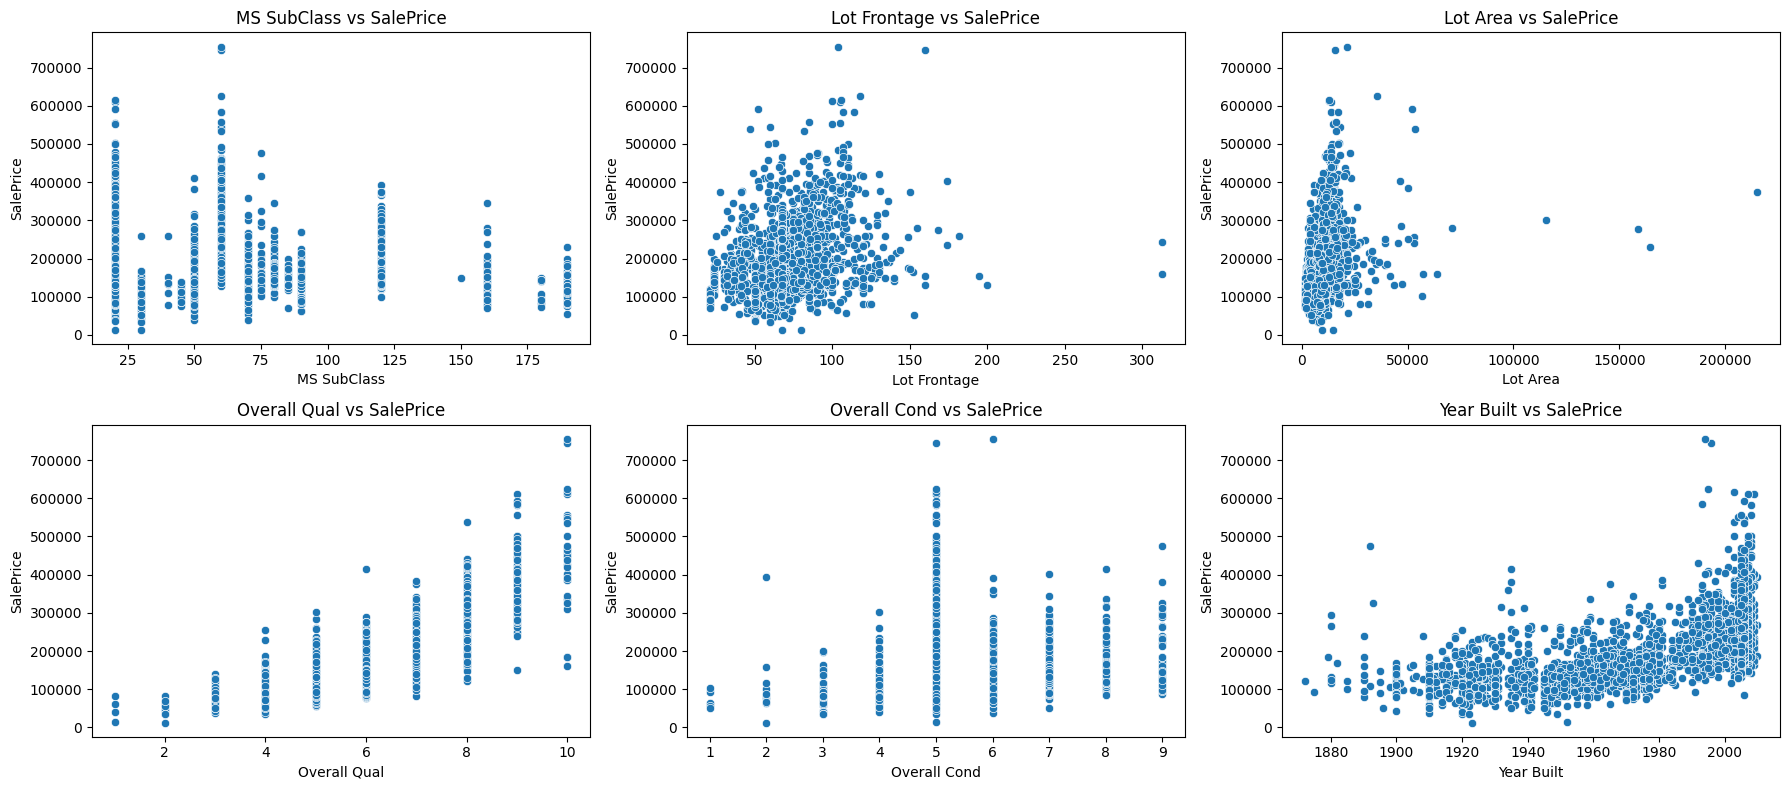

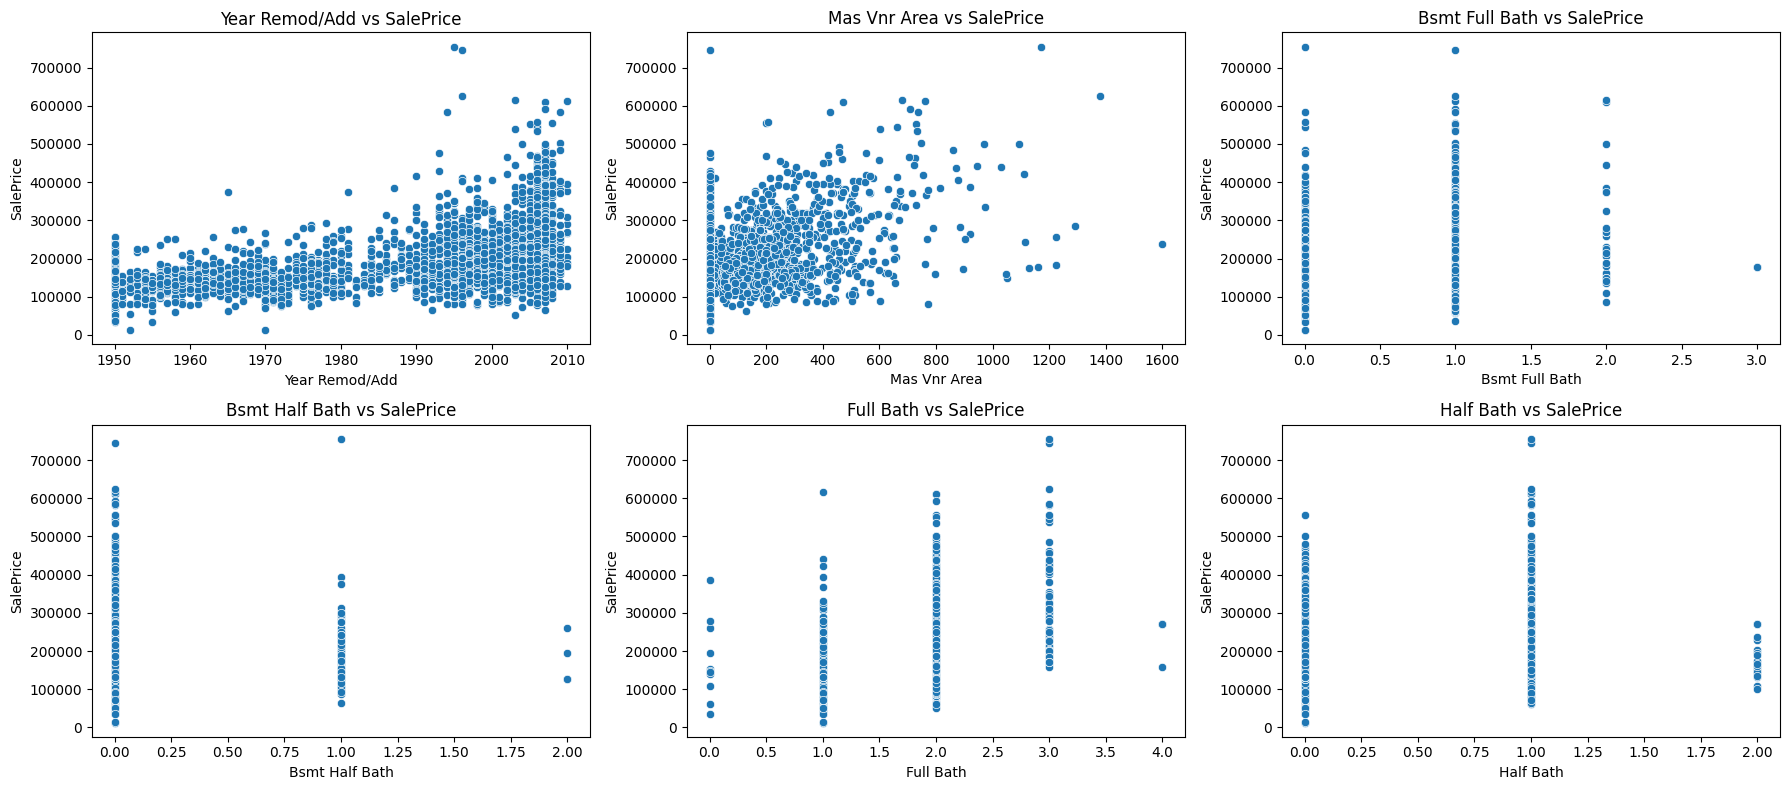

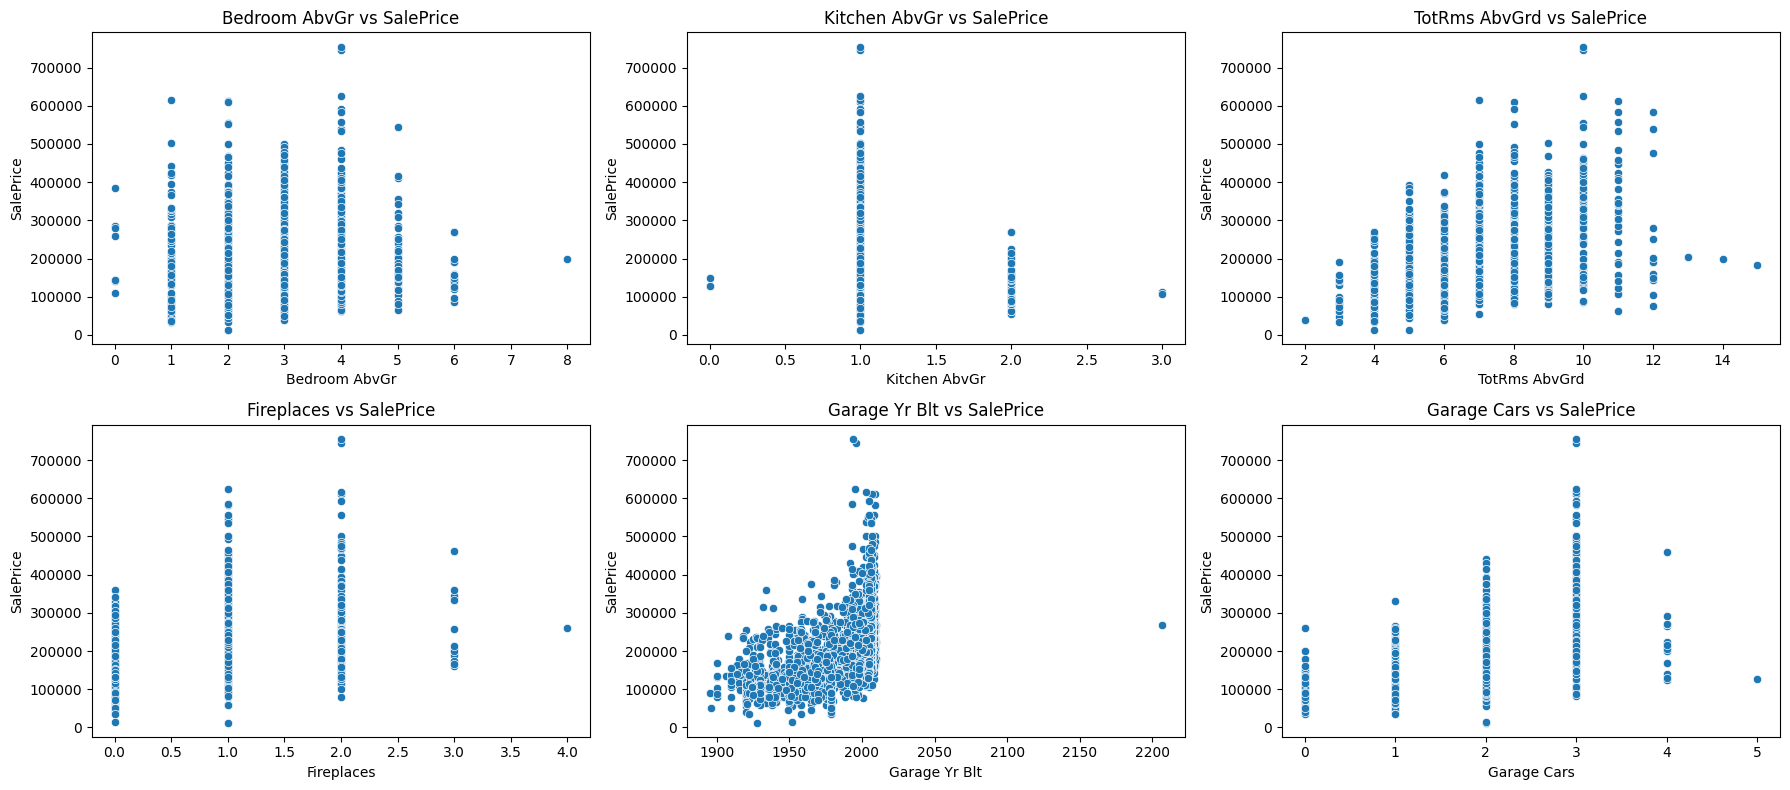

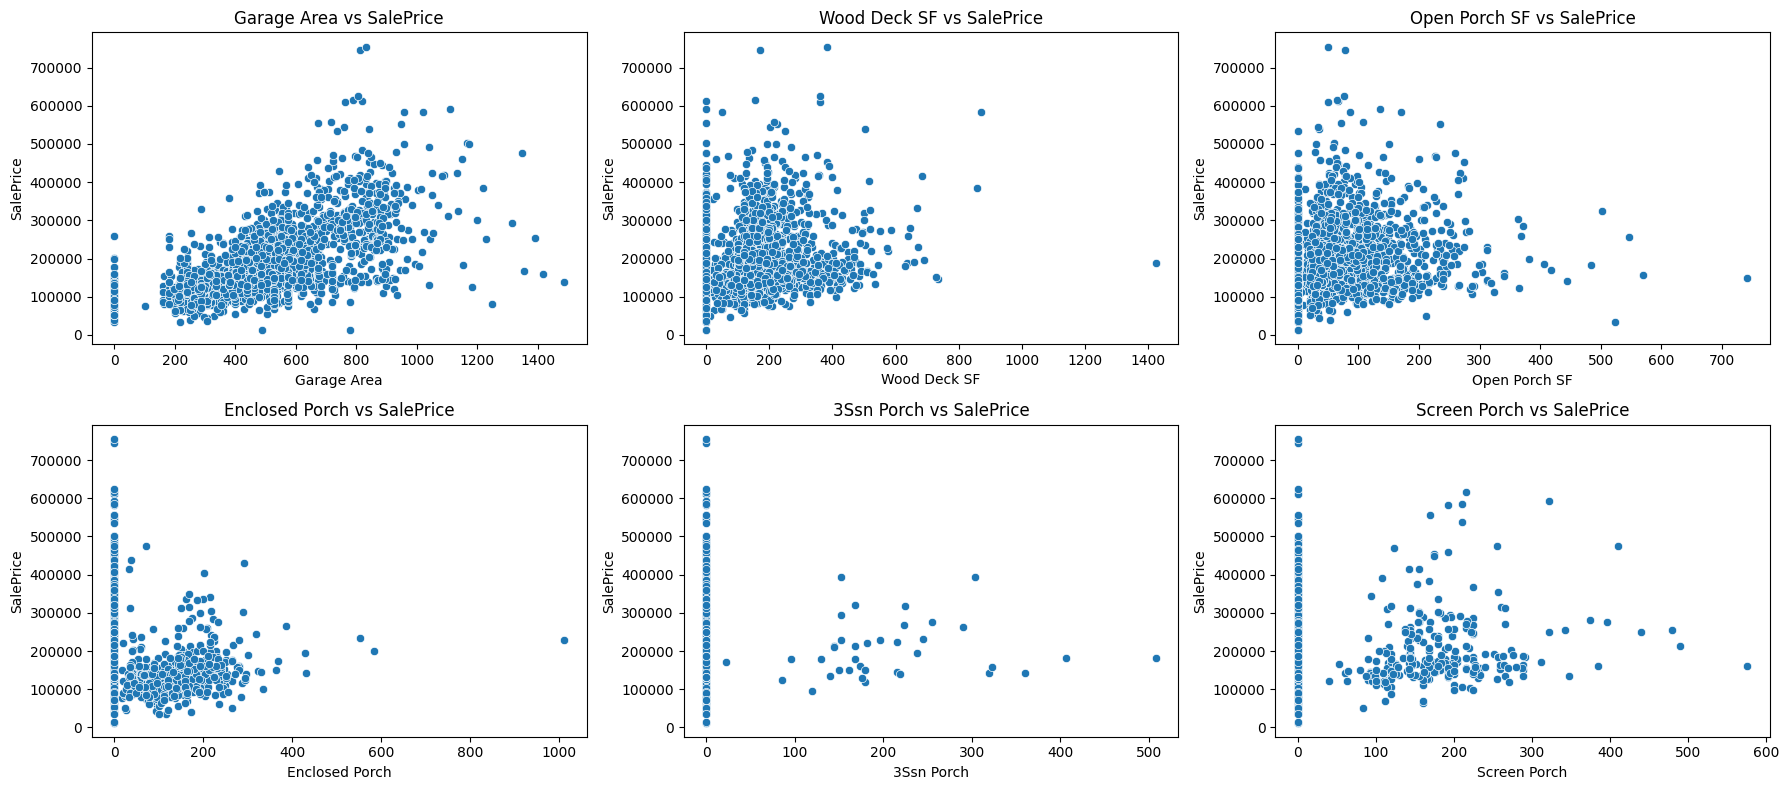

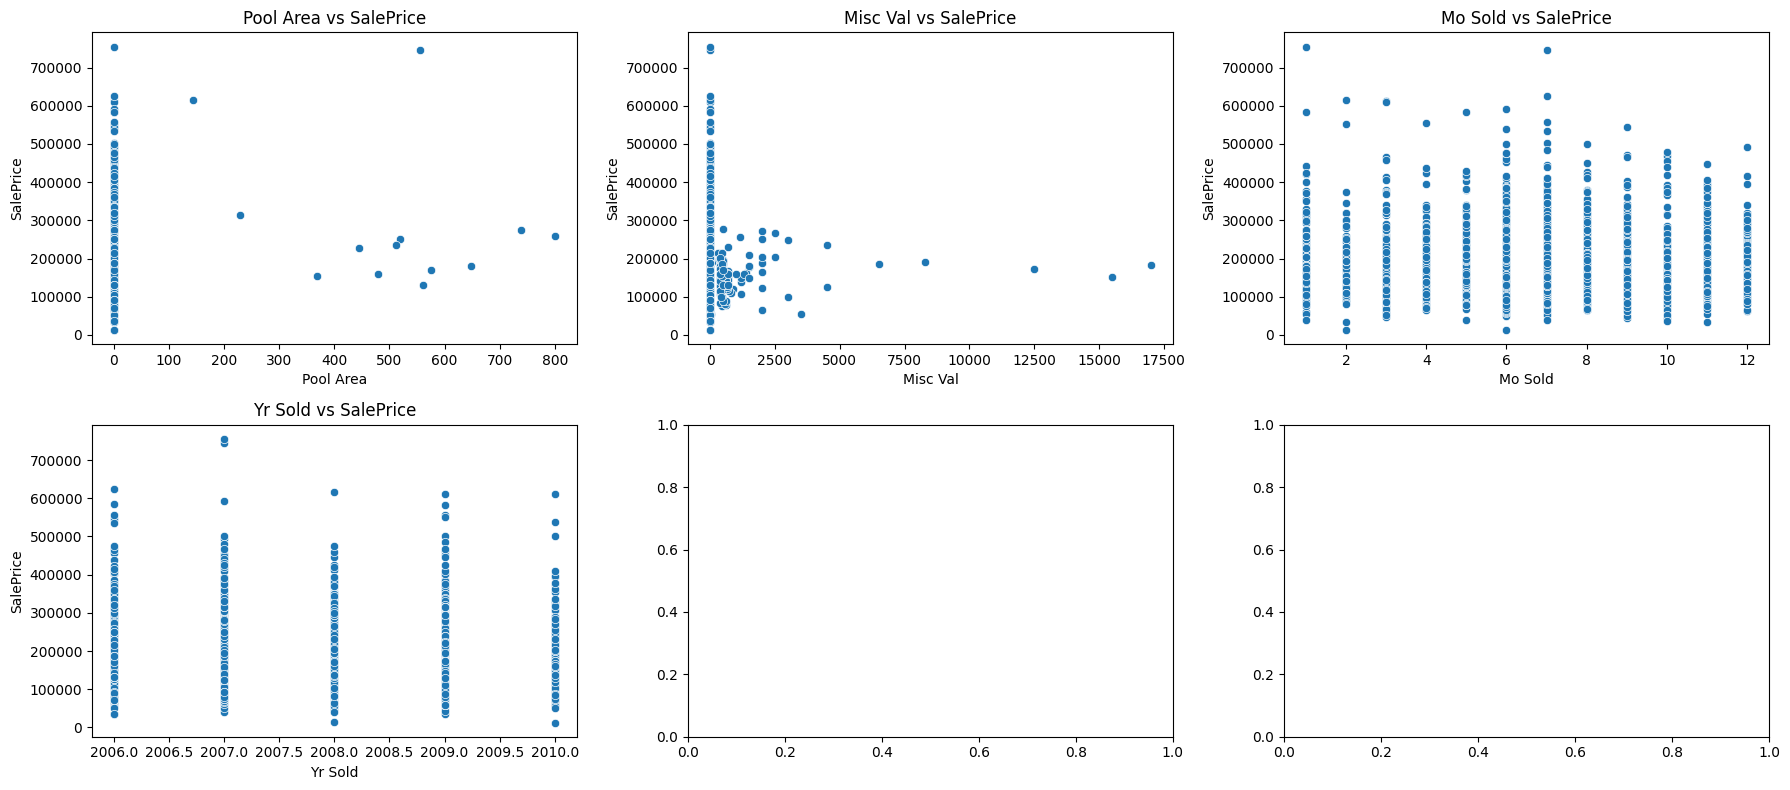

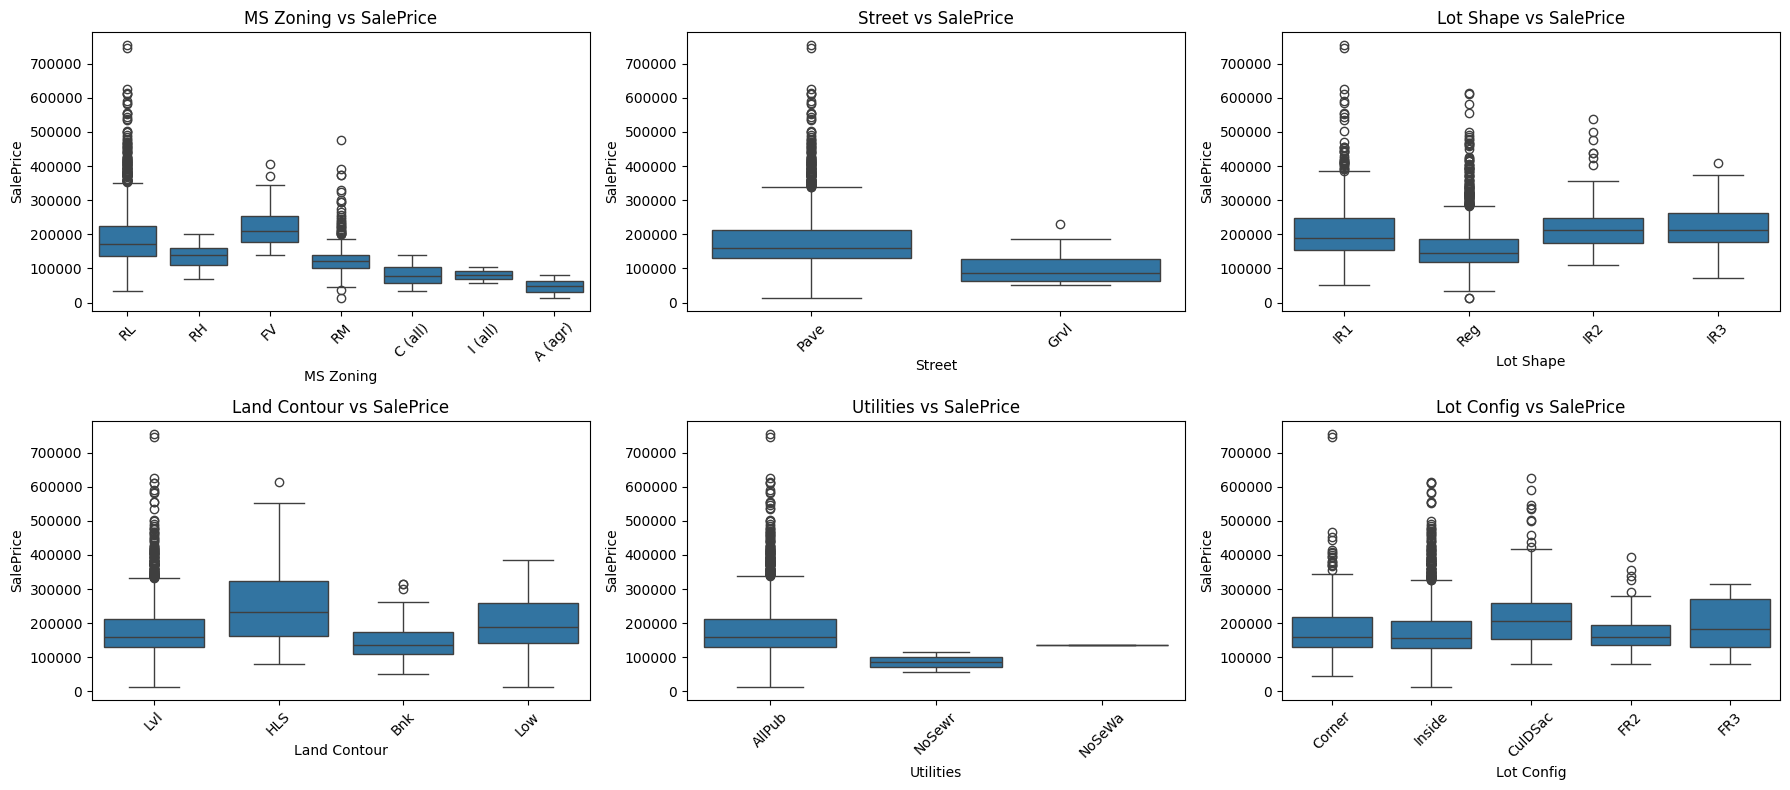

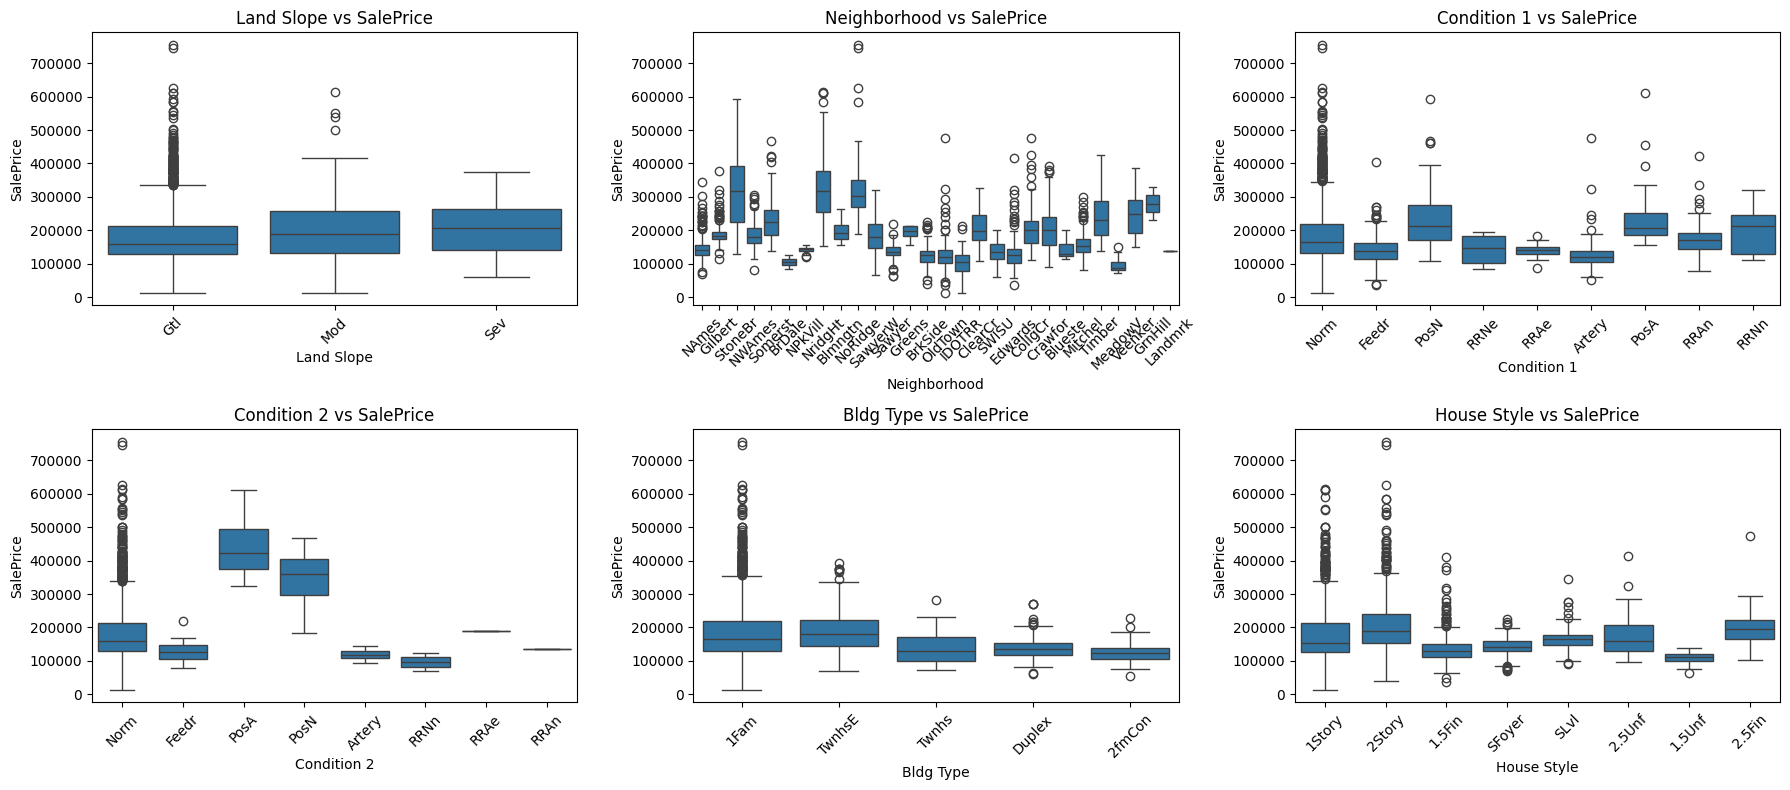

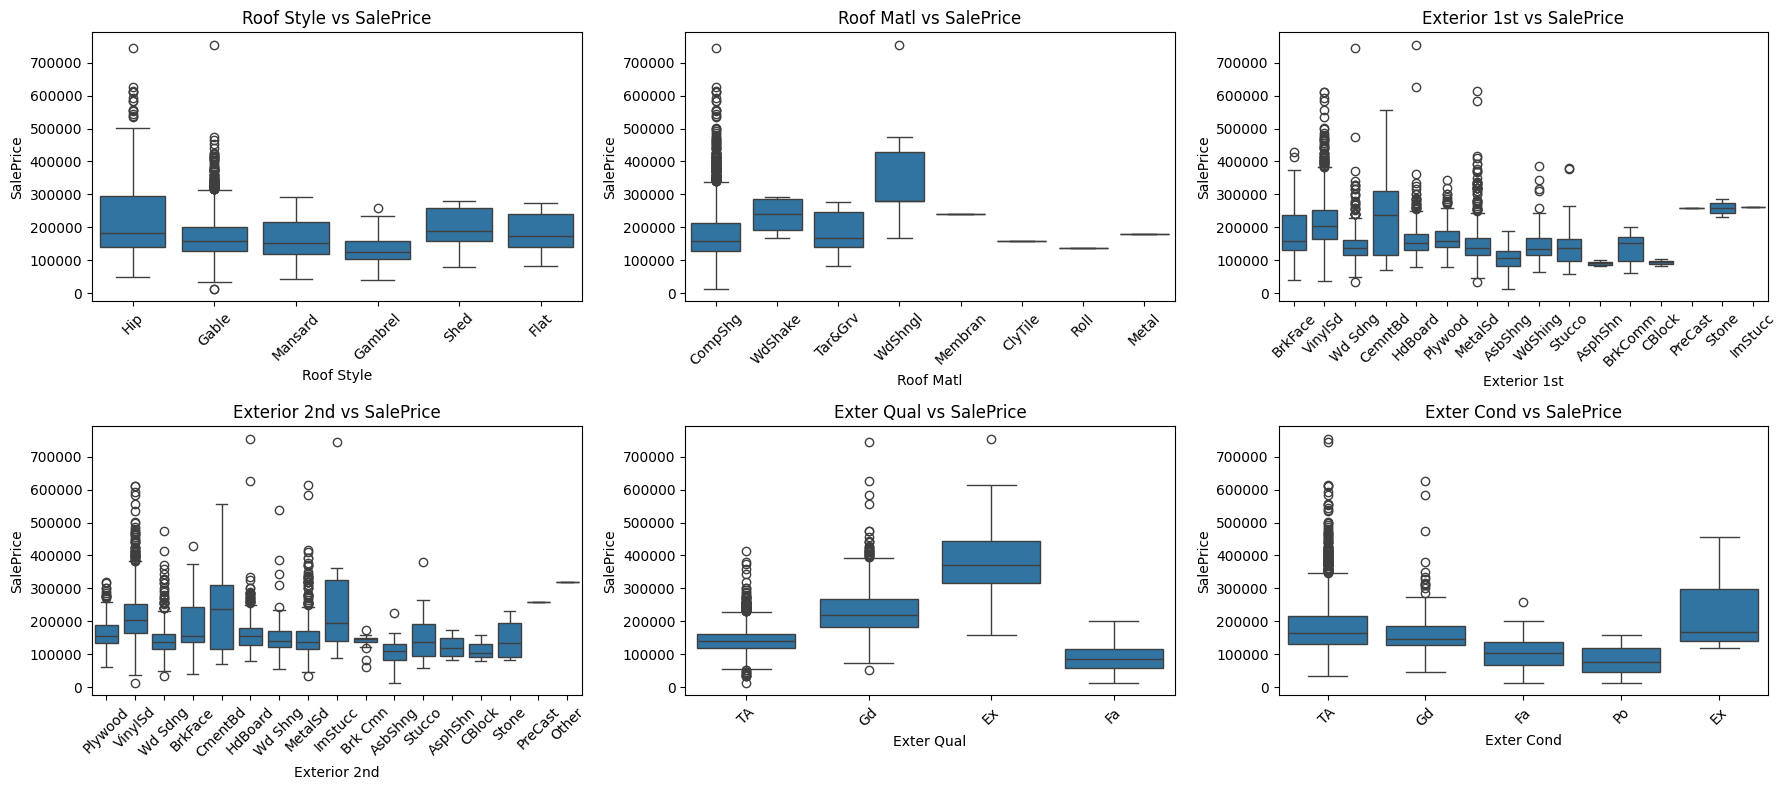

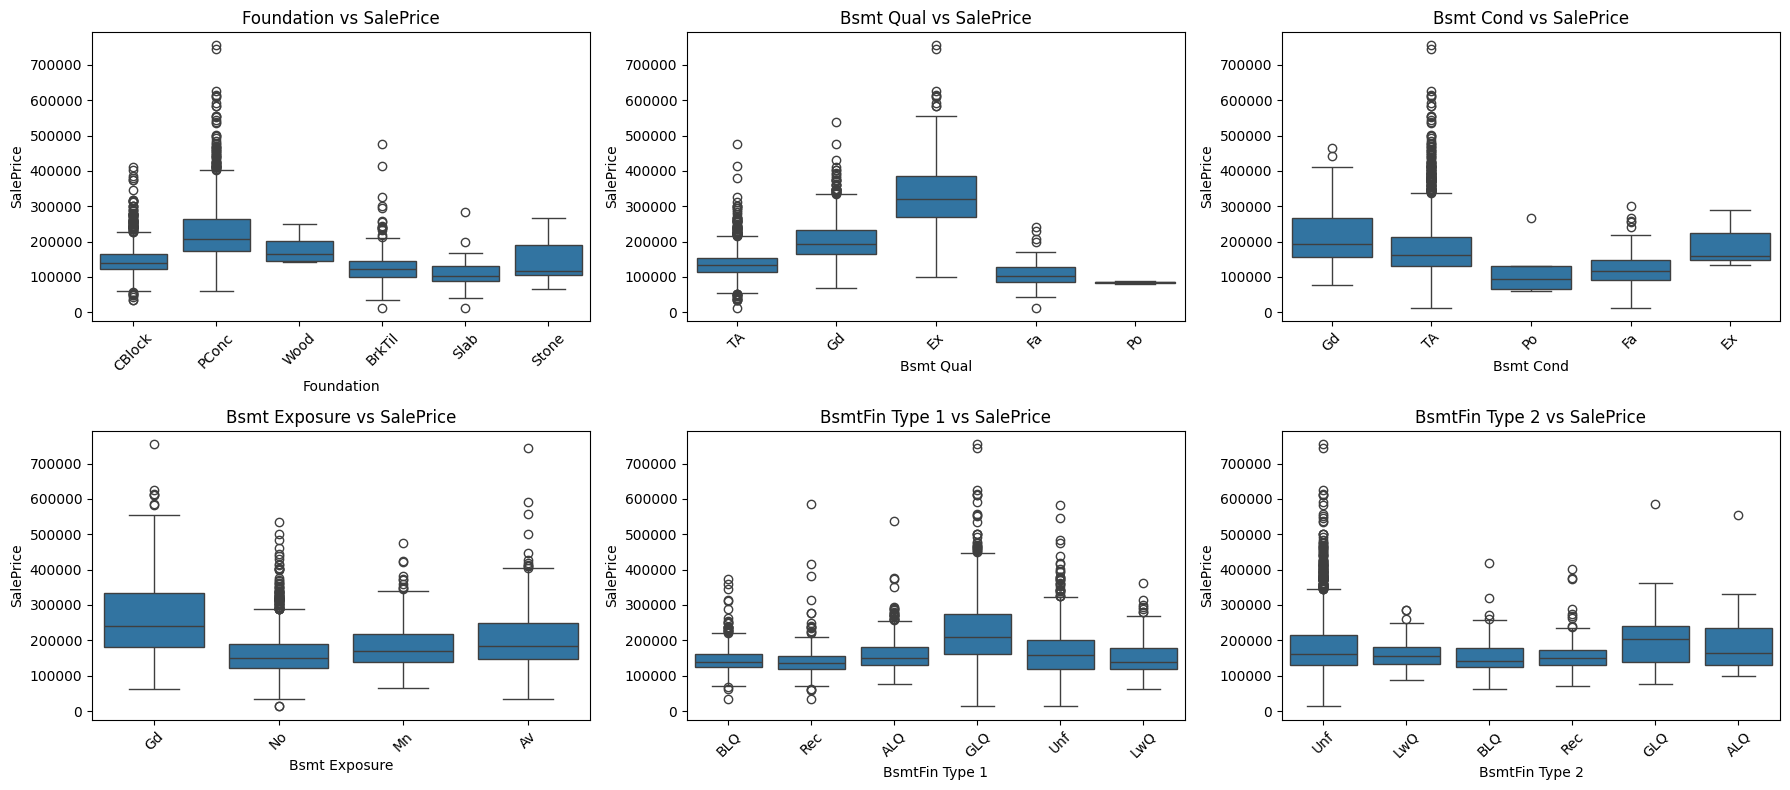

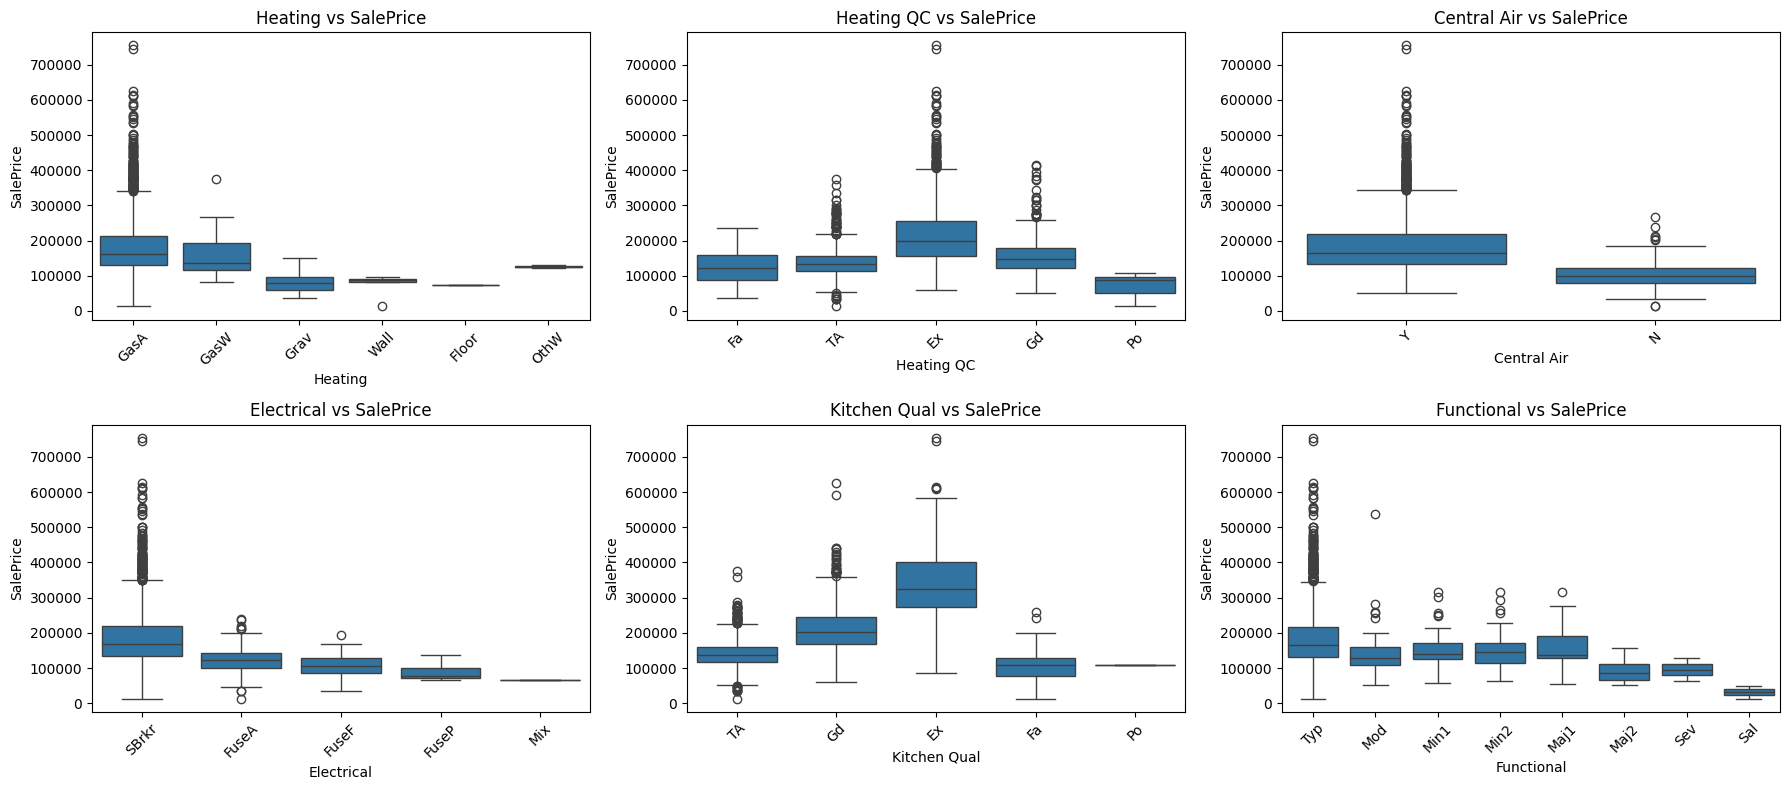

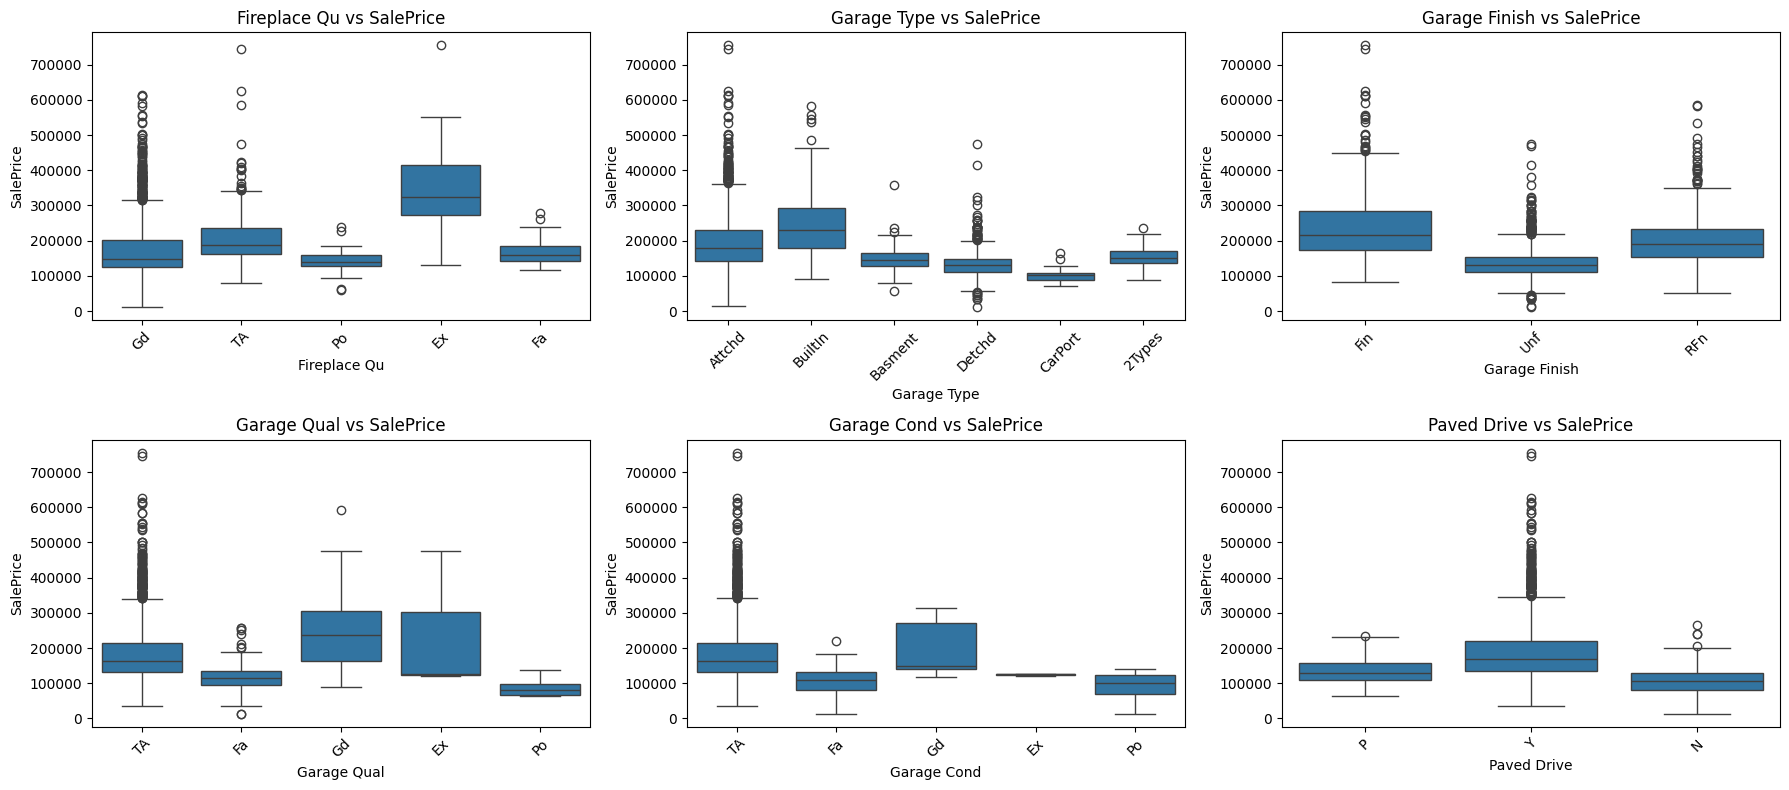

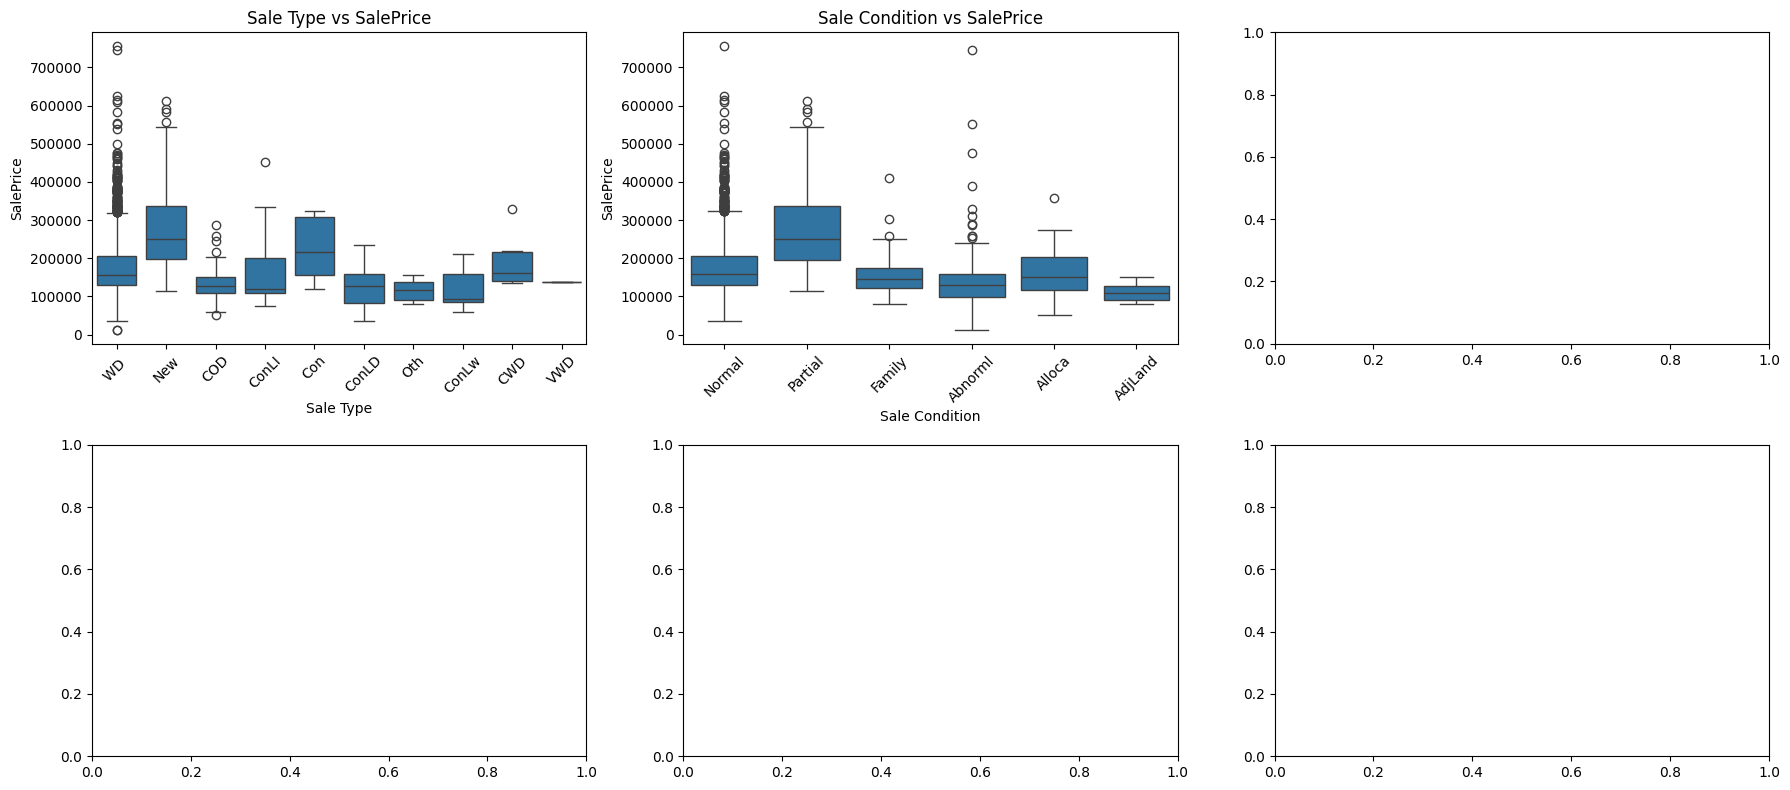

In [ ]:
plot_numeric_features(df_clean)
plot_categorical_features(df_clean)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copiamos df_clean para no afectar el original
df_scaled = df_clean.copy()

# Escalador para variables numéricas predictoras
scaler_X = StandardScaler()

# Columnas numéricas a escalar (excepto la variable objetivo SalePrice)
num_cols_to_scale = df_scaled.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Escalamos las variables numéricas predictoras
df_scaled[num_cols_to_scale] = scaler_X.fit_transform(df_scaled[num_cols_to_scale])



# Revisar las primeras filas para confirmar
df_scaled.head()



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-0.877005,RL,3.375742,2.744381,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,WD,Normal,215000.0
1,-0.877005,RH,0.514952,0.187097,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,WD,Normal,105000.0
2,-0.877005,RL,0.561850,0.522814,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,WD,Normal,172000.0
3,-0.877005,RL,1.124628,0.128458,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,WD,Normal,244000.0
4,0.061285,RL,0.233563,0.467348,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,WD,Normal,189900.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_scaled.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-0.877005,5,3.375742,2.744381,1,0,3,0,0,0,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,9,4,215000.0
1,-0.877005,4,0.514952,0.187097,1,3,3,0,4,0,...,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,9,4,105000.0
2,-0.877005,5,0.561850,0.522814,1,0,3,0,0,0,...,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,9,4,172000.0
3,-0.877005,5,1.124628,0.128458,1,3,3,0,0,0,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,9,4,244000.0
4,0.061285,5,0.233563,0.467348,1,0,3,0,4,0,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,9,4,189900.0


In [ ]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'KernelRidge': KernelRidge(),
    'SGDRegressor': SGDRegressor(),
    'BayesianRidge': BayesianRidge(),
    'GaussianProcess': GaussianProcessRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}


In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y target
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Separar en entrenamiento y test (70% entrenamiento, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Mostrar tamaños para confirmar
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (2051, 66)
Tamaño X_test: (879, 66)
Tamaño y_train: (2051,)
Tamaño y_test: (879,)


In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Evitar división por cero
    non_zero_idx = y_true != 0
    if not np.any(non_zero_idx):
        return np.nan  # O algún valor que indique que no se puede calcular

    y_true = y_true[non_zero_idx]
    y_pred = y_pred[non_zero_idx]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape



In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    non_zero_idx = y_true != 0
    y_true = y_true[non_zero_idx]
    y_pred = y_pred[non_zero_idx]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for name, model in models.items():
    mae_scores = []
    mse_scores = []
    r2_scores = []
    mape_scores = []

    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)


        mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))
        mse_scores.append(mean_squared_error(y_val_cv, y_pred_cv))
        r2_scores.append(r2_score(y_val_cv, y_pred_cv))
        mape_scores.append(mean_absolute_percentage_error(y_val_cv, y_pred_cv))

    print(f'\nModelo: {name}')
    print(f'MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}')
    print(f'MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}')
    print(f'R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}')
    print(f'MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.4f}%')






Modelo: LinearRegression
MAE: 21783.5154 ± 660.0181
MSE: 1109279017.3475 ± 148241218.5194
R2: 0.8231 ± 0.0305
MAPE: 13.09% ± 0.7821%

Modelo: Lasso
MAE: 21781.9619 ± 659.2120
MSE: 1109077780.9229 ± 148092453.0508
R2: 0.8231 ± 0.0305
MAPE: 13.09% ± 0.7817%

Modelo: ElasticNet
MAE: 21937.8118 ± 532.8479
MSE: 1165574631.0467 ± 156334617.7873
R2: 0.8153 ± 0.0233
MAPE: 12.91% ± 0.8658%

Modelo: KernelRidge
MAE: 22650.2523 ± 660.7009
MSE: 1184846757.4794 ± 158307012.9826
R2: 0.8113 ± 0.0311
MAPE: 13.77% ± 0.7842%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Modelo: SGDRegressor
MAE: 18935765.1840 ± 12644100.8041
MSE: 1361551686121749.2500 ± 1125957470037041.5000
R2: -204305.1120 ± 168516.7999
MAPE: 13881.77% ± 9203.3855%

Modelo: BayesianRidge
MAE: 21744.5456 ± 619.9254
MSE: 1103802838.9327 ± 144314870.3574
R2: 0.8241 ± 0.0293
MAPE: 13.02% ± 0.7423%

Modelo: GaussianProcess
MAE: 178561.1791 ± 4536.6543
MSE: 38395896472.8872 ± 2492378763.6235
R2: -5.1017 ± 0.4726
MAPE: 98.76% ± 0.1108%

Modelo: RandomForest
MAE: 18317.1849 ± 220.2460
MSE: 896363765.5312 ± 77457227.9757
R2: 0.8573 ± 0.0162
MAPE: 10.96% ± 0.9512%

Modelo: SVR
MAE: 56033.0129 ± 3898.0196
MSE: 6795335884.6104 ± 1103760882.0110
R2: -0.0662 ± 0.0245
MAPE: 32.11% ± 1.7747%


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Pipeline con preprocesamiento y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best MAE (CV):", -grid_search.best_score_)

# Evaluar en test con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R2:", r2_score(y_test, y_pred_test))

# Implementar función MAPE si la tienes y evaluarla también



Best params: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best MAE (CV): 18713.733132485417
Test MAE: 18169.524654250577
Test MSE: 832658955.8240308
Test R2: 0.8815466969483227


In [ ]:
param_grids = {
    'LinearRegression': {},  # No hyperparameters to tune

    'Lasso': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'max_iter': [1000, 5000, 10000]
    },

    'ElasticNet': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
        'max_iter': [1000, 5000, 10000]
    },

    'KernelRidge': {
        'alpha': [0.1, 1, 10, 100],
        'kernel': ['linear', 'polynomial', 'rbf'],
        'degree': [2, 3, 4]  # Only relevant for polynomial kernel
    },

    'SGDRegressor': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [1000, 2000],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
    },

    'BayesianRidge': {
        'alpha_1': [1e-6, 1e-7, 1e-8],
        'alpha_2': [1e-6, 1e-7, 1e-8],
        'lambda_1': [1e-6, 1e-7, 1e-8],
        'lambda_2': [1e-6, 1e-7, 1e-8]
    },

    'GaussianProcess': {
        'alpha': [1e-10, 1e-5, 1e-2, 1],
        # Kernel params usually kept default or customized separately
    },

    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'SVR': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2, 0.5],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4]  # Only for polynomial kernel
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def run_grid_search(model, param_grid, X, y):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X, y)
    last_step_name = model.steps[-1][0]
    print(f"Best params for {last_step_name}: {grid.best_params_}")
    print(f"Best CV MAE: {-grid.best_score_:.4f}")
    return grid.best_estimator_

def run_random_search(model, param_dist, X, y, n_iter=20):
    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, cv=5,
                                       scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
    random_search.fit(X, y)
    last_step_name = model.steps[-1][0]
    print(f"Best params for {last_step_name}: {random_search.best_params_}")
    print(f"Best CV MAE: {-random_search.best_score_:.4f}")
    return random_search.best_estimator_



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def run_grid_search(pipeline, param_grid, X, y):
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    search.fit(X, y)
    step_name = pipeline.steps[-1][0]
    print(f"Best params for {step_name}: {search.best_params_}")
    print(f"Best CV MAE: {-search.best_score_:.4f}")
    return search.best_estimator_

def run_random_search(pipeline, param_grid, X, y, n_iter=30):
    search = RandomizedSearchCV(pipeline, param_grid, n_iter=n_iter, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
    search.fit(X, y)
    step_name = pipeline.steps[-1][0]
    print(f"Best params for {step_name}: {search.best_params_}")
    print(f"Best CV MAE: {-search.best_score_:.4f}")
    return search.best_estimator_


best_models_grid = {}
best_models_random = {}


for model_name, model_instance in models.items():
    print(f"Running searches for {model_name}...")

    step_name = model_name.lower()

    # Build pipeline, no scaler for these models (or adapt as needed)
    if model_name in ['RandomForest', 'BayesianRidge', 'GaussianProcess']:
        pipeline = Pipeline([(step_name, model_instance)])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model_instance)
        ])

    param_grid = param_grids.get(model_name, {})

    if param_grid:
        prefixed_param_grid = {f"{step_name}__{k}": v for k, v in param_grid.items()}

        best_grid_model = run_grid_search(pipeline, prefixed_param_grid, X, y)
        best_models_grid[model_name] = best_grid_model

        best_random_model = run_random_search(pipeline, prefixed_param_grid, X, y, n_iter=30)
        best_models_random[model_name] = best_random_model
    else:
        print(f"No param grid defined for {model_name}, skipping search.")

Running searches for LinearRegression...
No param grid defined for LinearRegression, skipping search.
Running searches for Lasso...
Best params for lasso: {'lasso__alpha': 10, 'lasso__max_iter': 1000}
Best CV MAE: 21951.6551


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=30. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for lasso: {'lasso__max_iter': 1000, 'lasso__alpha': 10}
Best CV MAE: 21951.6551
Running searches for ElasticNet...
Best params for elasticnet: {'elasticnet__alpha': 1, 'elasticnet__l1_ratio': 0.7, 'elasticnet__max_iter': 1000}
Best CV MAE: 21655.4850
Best params for elasticnet: {'elasticnet__max_iter': 10000, 'elasticnet__l1_ratio': 0.7, 'elasticnet__alpha': 1}
Best CV MAE: 21655.4850
Running searches for KernelRidge...
Best params for kernelridge: {'kernelridge__alpha': 10, 'kernelridge__degree': 3, 'kernelridge__kernel': 'polynomial'}
Best CV MAE: 18428.1890
Best params for kernelridge: {'kernelridge__kernel': 'polynomial', 'kernelridge__degree': 3, 'kernelridge__alpha': 10}
Best CV MAE: 18428.1890
Running searches for SGDRegressor...
Best params for sgdregressor: {'sgdregressor__alpha': 0.1, 'sgdregressor__learning_rate': 'optimal', 'sgdregressor__max_iter': 2000, 'sgdregressor__penalty': 'l2'}
Best CV MAE: 21755.4752
Best params for sgdregressor: {'sgdregressor__penalt

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=30. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for gaussianprocess: {'gaussianprocess__alpha': 1e-10}
Best CV MAE: 179688.0561
Running searches for RandomForest...
Best params for randomforest: {'randomforest__max_depth': 20, 'randomforest__min_samples_leaf': 2, 'randomforest__min_samples_split': 5, 'randomforest__n_estimators': 300}
Best CV MAE: 18668.5830
Best params for randomforest: {'randomforest__n_estimators': 300, 'randomforest__min_samples_split': 2, 'randomforest__min_samples_leaf': 2, 'randomforest__max_depth': None}
Best CV MAE: 18753.2087
Running searches for SVR...
Best params for svr: {'svr__C': 100, 'svr__degree': 2, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
Best CV MAE: 21096.3768
Best params for svr: {'svr__kernel': 'linear', 'svr__epsilon': 0.01, 'svr__degree': 4, 'svr__C': 100}
Best CV MAE: 21096.3768


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import pandas as pd

# Función para calcular todas las métricas con validación cruzada
def evaluate_model_cv(model, X, y, cv=5):
    # Predicciones por validación cruzada (sin hacer refit fuera de CV)
    y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    return {'MAE': mae, 'MSE': mse, 'R2': r2, 'MAPE (%)': mape}

# Evaluar todos los mejores modelos y guardar resultados
results = {}

for model_name, model in best_models_grid.items():  # O best_models_random según prefieras
    print(f"Evaluating model: {model_name}")
    results[model_name] = evaluate_model_cv(model, X, y)

# Crear DataFrame resumen
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='MAE')

print("\nSummary of model performance:")
display(results_df)


Evaluating model: Lasso
Evaluating model: ElasticNet
Evaluating model: KernelRidge
Evaluating model: SGDRegressor
Evaluating model: BayesianRidge
Evaluating model: GaussianProcess
Evaluating model: RandomForest
Evaluating model: SVR

Summary of model performance:


,MAE,MSE,R2,MAPE (%)
KernelRidge,18428.188963,1.453241e+09,0.772209,10.615341
RandomForest,18769.503461,9.777839e+08,0.846735,10.980111
SVR,21096.376751,1.196711e+09,0.812419,11.876771
ElasticNet,21655.485038,1.147474e+09,0.820137,12.721500
BayesianRidge,21916.719544,1.137765e+09,0.821659,13.060760
SGDRegressor,21945.111375,1.138598e+09,0.821528,13.077133
Lasso,21951.655120,1.141680e+09,0.821045,13.113021
GaussianProcess,179688.056106,3.869402e+10,-5.065174,99.402004


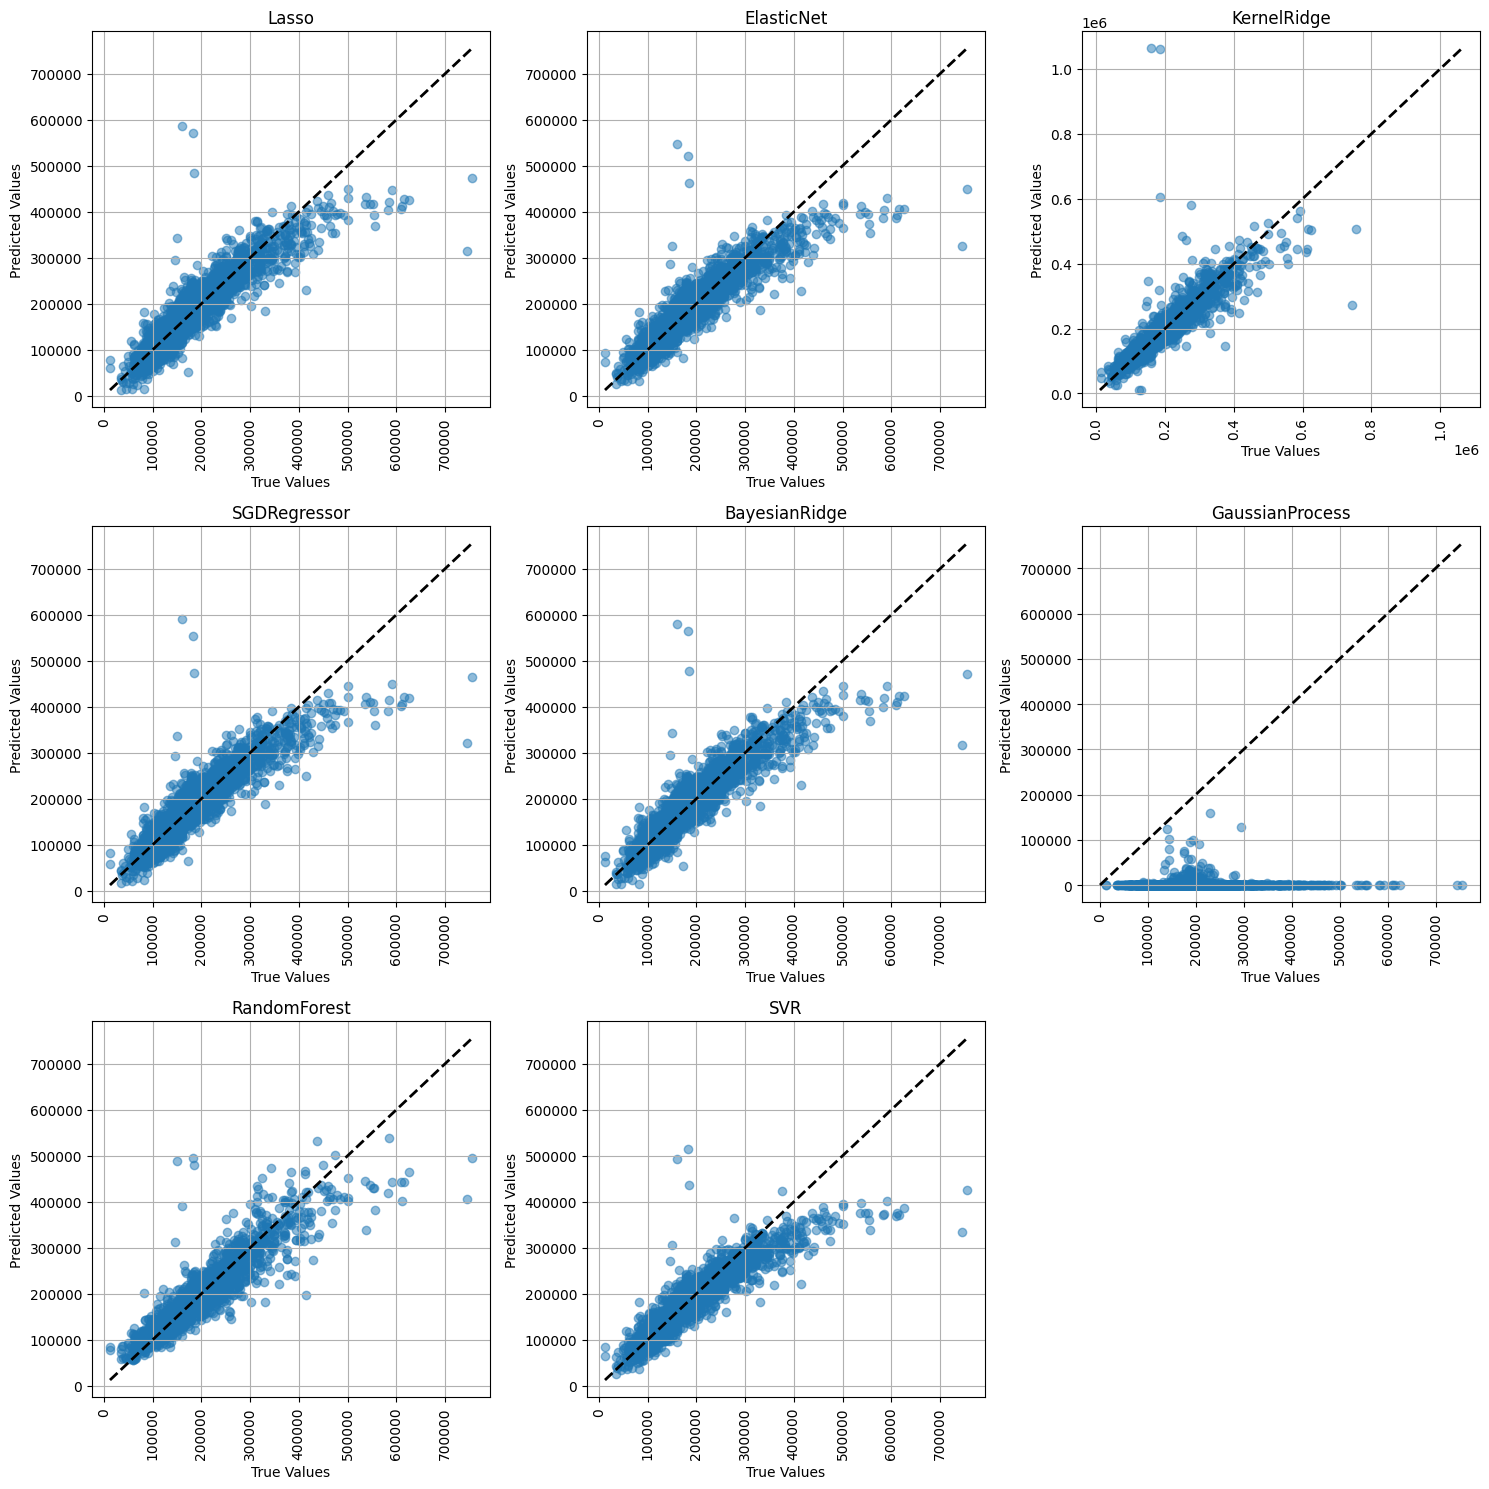

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import math

models_to_plot = list(best_models_grid.items())  # O best_models_random.items()

n_models = len(models_to_plot)
n_cols = 3
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Para indexar fácilmente

for i, (model_name, model) in enumerate(models_to_plot):
    ax = axes[i]
    y_pred = cross_val_predict(model, X, y, cv=5, n_jobs=-1)

    ax.scatter(y, y_pred, alpha=0.5)
    lims = [min(y.min(), y_pred.min()), max(y.max(), y_pred.max())]
    ax.plot(lims, lims, 'k--', lw=2)
    ax.tick_params(axis='x', rotation=90)  # vertical
    ax.set_title(model_name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.grid(True)

# Si hay más subplots que modelos, ocultar esos axes vacíos
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
top3_models = results_df.head(3)
print("Modelos seleccionados:")
print(top3_models)



Modelos seleccionados:
                       MAE           MSE        R2   MAPE (%)
KernelRidge   18428.188963  1.453241e+09  0.772209  10.615341
RandomForest  18769.503461  9.777839e+08  0.846735  10.980111
SVR           21096.376751  1.196711e+09  0.812419  11.876771


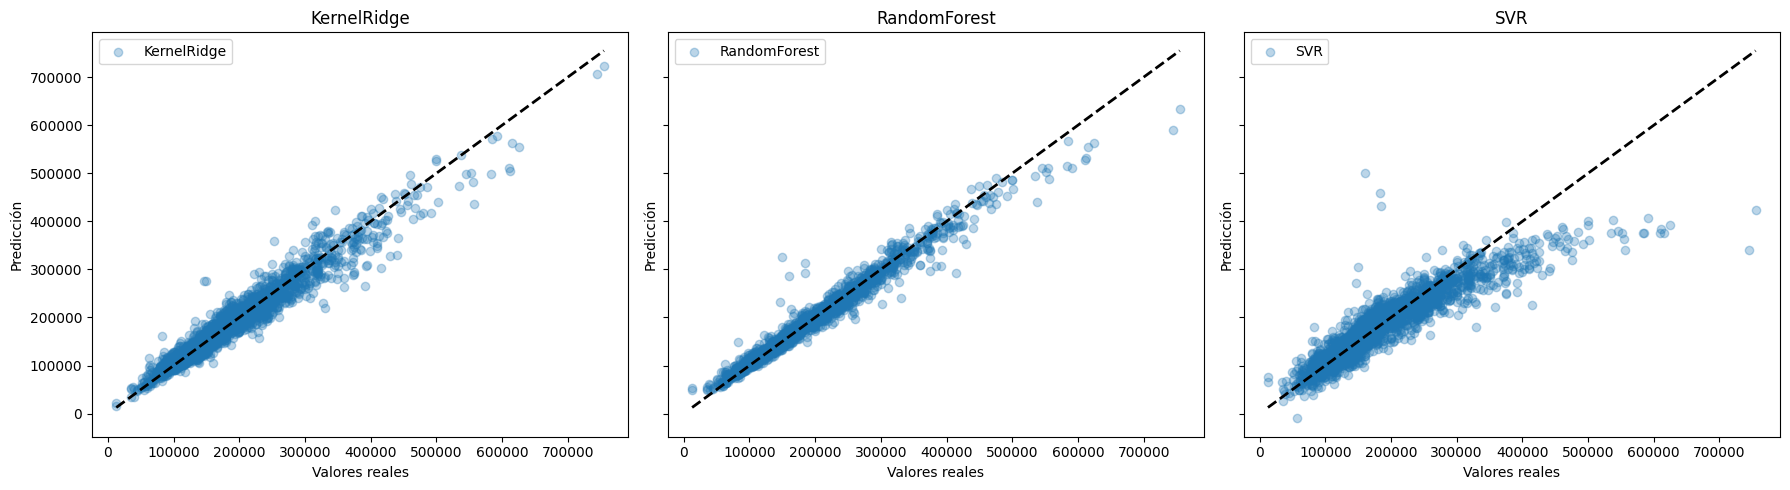

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, model_name in zip(axes, top3_models.index):
    model = best_models_grid[model_name]
    y_pred = model.predict(X)
    ax.scatter(y, y_pred, alpha=0.3, label=f'{model_name}')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_title(model_name)
    ax.set_xlabel('Valores reales')
    ax.set_ylabel('Predicción')
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import joblib

for model_name in top3_models.index:
    joblib.dump(best_models_grid[model_name], f'{model_name}_modelo.pkl')

In [ ]:
best_models_grid['KernelRidge']
best_models_grid['RandomForest']
best_models_grid['ElasticNet']


Pipeline(steps=[('scaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=1, l1_ratio=0.7))])

In [ ]:
import joblib

# Guardar los tres modelos
joblib.dump(best_models_grid['KernelRidge'], 'modelo_kernelridge.pkl')
joblib.dump(best_models_grid['RandomForest'], 'modelo_randomforest.pkl')
joblib.dump(best_models_grid['ElasticNet'], 'modelo_elasticnet.pkl')


['modelo_elasticnet.pkl']

In [ ]:
from google.colab import files

files.download('modelo_kernelridge.pkl')
files.download('modelo_randomforest.pkl')
files.download('modelo_elasticnet.pkl')
